In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [54]:
merged_df = pd.read_csv('../data/megaMergedData.csv')
merged_df.head()

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,13640.0,12816.0,13259.0,20.1,17.6,23.7,37.0,32.0,34.0,...,34.8,2109,2756,957,67.3,57.0,77.7,37.9,39.6,36.6
1,Armed forces,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN,...,42.6,3306,3258,4250,0.1,0.1,0.0,48.5,48.5,49.0
2,Clerks,17021.0,14948.0,16161.0,1.2,2.1,0.4,43.0,42.0,43.0,...,44.5,2832,2836,2805,1.1,2.0,0.2,44.1,44.4,41.6
3,Craft & related trades,21803.0,15686.0,21456.0,13.8,18.3,8.2,51.0,35.0,47.0,...,24.6,2773,2973,1393,5.9,8.4,3.5,42.7,46.5,33.8
4,Elementary occupations,15033.0,11388.0,13622.0,20.2,23.4,16.1,48.0,40.0,45.0,...,32.3,1491,1692,1054,13.6,16.1,11.0,40.2,46.1,31.5


total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,total_ear_2008,male_ear_2008,female_ear_2008,total_pop_2008,male_pop_2008,female_pop_2008,total_wor_2008,male_wor_2008,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998

In [55]:
#mainScalar = StandardScaler()
mainScalar = MinMaxScaler()
stander_columns   = ['total_ear_2018', 'male_ear_2018', 'female_ear_2018', 'total_pop_2018', 'male_pop_2018', 'female_pop_2018', 'total_wor_2018', 'male_wor_2018', 'female_wor_2018']
stander_columns_2 = ['total_ear_2008', 'male_ear_2008', 'female_ear_2008', 'total_pop_2008', 'male_pop_2008', 'female_pop_2008', 'total_wor_2008', 'male_wor_2008', 'female_wor_2008']
stander_columns_3 = ['total_ear_1998', 'male_ear_1998', 'female_ear_1998', 'total_pop_1998', 'male_pop_1998', 'female_pop_1998', 'total_wor_1998', 'male_wor_1998', 'female_wor_1998']

mainScalar = mainScalar.fit(merged_df[stander_columns])

# Combine columns for all years
# all_years_columns = stander_columns + stander_columns_2 + stander_columns_3
# mainScalar = StandardScaler()
# mainScalar.fit(merged_df[all_years_columns])

# Now transform each year's data using the same scaler
# normalized_2018 = pd.DataFrame(mainScalar.transform(merged_df[stander_columns]), columns=stander_columns)
# normalized_2008 = pd.DataFrame(mainScalar.transform(merged_df[stander_columns_2]), columns=stander_columns_2)
# normalized_1998 = pd.DataFrame(mainScalar.transform(merged_df[stander_columns_3]), columns=stander_columns_3)

In [56]:
StandardScaler


sklearn.preprocessing._data.StandardScaler

In [57]:

# Standardize stander_columns (2018)
normalized_2018 = pd.DataFrame(
    mainScalar.transform(merged_df[stander_columns]),
    columns=stander_columns
)

# Standardize stander_columns_2 (2008)
merged_df_2008_renamed = merged_df[stander_columns_2].copy()
merged_df_2008_renamed.columns = stander_columns  # Rename to match 2018 structure
merged_df_2008_renamed.head()
normalized_2008 = pd.DataFrame(
    mainScalar.transform(merged_df_2008_renamed), 
    columns=stander_columns_2
)

# Standardize stander_columns_3 (1998)
merged_df_1998_renamed = merged_df[stander_columns_3].copy()
merged_df_1998_renamed.columns = stander_columns  # Rename to match 1998 structure
merged_df_1998_renamed.head()
normalized_1998 = pd.DataFrame(
    mainScalar.transform(merged_df_1998_renamed), 
    columns=stander_columns_3
)

# Merge back to the original DataFrame
merged_df_scaled = merged_df.copy()
merged_df_scaled[stander_columns] = normalized_2018
merged_df_scaled[stander_columns_2] = normalized_2008
merged_df_scaled[stander_columns_3] = normalized_1998

In [58]:
merged_df[stander_columns].head()

,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018
0,13640.0,12816.0,13259.0,20.1,17.6,23.7,37.0,32.0,34.0
1,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN
2,17021.0,14948.0,16161.0,1.2,2.1,0.4,43.0,42.0,43.0
3,21803.0,15686.0,21456.0,13.8,18.3,8.2,51.0,35.0,47.0
4,15033.0,11388.0,13622.0,20.2,23.4,16.1,48.0,40.0,45.0


In [59]:
merged_df

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,13640.0,12816.0,13259.0,20.1,17.6,23.7,37.0,32.0,34.0,...,34.8,2109,2756,957,67.3,57.0,77.7,37.9,39.6,36.6
1,Armed forces,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN,...,42.6,3306,3258,4250,0.1,0.1,0.0,48.5,48.5,49.0
2,Clerks,17021.0,14948.0,16161.0,1.2,2.1,0.4,43.0,42.0,43.0,...,44.5,2832,2836,2805,1.1,2.0,0.2,44.1,44.4,41.6
3,Craft & related trades,21803.0,15686.0,21456.0,13.8,18.3,8.2,51.0,35.0,47.0,...,24.6,2773,2973,1393,5.9,8.4,3.5,42.7,46.5,33.8
4,Elementary occupations,15033.0,11388.0,13622.0,20.2,23.4,16.1,48.0,40.0,45.0,...,32.3,1491,1692,1054,13.6,16.1,11.0,40.2,46.1,31.5
5,Legislators senior officials,34162.0,29342.0,33245.0,0.7,1.3,0.2,48.0,49.0,48.0,...,54.5,8037,8068,7525,0.1,0.2,0.0,51.0,51.8,41.4
6,Plant & machine operators,17578.0,9401.0,17404.0,1.9,3.6,0.3,54.0,37.0,53.0,...,48.0,2981,2995,2037,1.1,2.0,0.3,48.0,52.2,21.0
7,Professionals,25684.0,14742.0,21065.0,2.1,3.5,0.9,41.0,40.0,41.0,...,41.0,5079,5141,4631,0.4,0.7,0.1,39.7,40.1,36.3
8,Service workers,15194.0,10580.0,14125.0,23.8,27.1,19.5,51.0,43.0,47.0,...,47.6,2507,2506,2525,5.2,6.9,3.5,51.1,53.3,46.6
9,Technicians,26494.0,21838.0,24856.0,2.4,3.2,1.6,44.0,42.0,44.0,...,39.9,2971,3057,2678,2.2,3.5,0.9,39.5,39.6,39.0


In [60]:
merged_df_scaled

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,0.000000,0.171255,0.000000,0.200200,0.174349,0.237,0.000000,0.000000,0.000000,...,0.042105,-0.561885,-0.333233,-0.615531,0.672673,0.569138,0.777,0.052941,0.447059,0.136842
1,Armed forces,NaN,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,...,0.452632,-0.503557,-0.308059,-0.450766,0.000000,-0.001002,0.000,0.676471,0.970588,0.789474
2,Clerks,0.164750,0.278171,0.145202,0.011011,0.019038,0.004,0.352941,0.588235,0.473684,...,0.552632,-0.526654,-0.329221,-0.523066,0.010010,0.018036,0.002,0.417647,0.729412,0.400000
3,Craft & related trades,0.397768,0.315180,0.410137,0.137137,0.181363,0.082,0.823529,0.176471,0.684211,...,-0.494737,-0.529529,-0.322351,-0.593716,0.058058,0.082164,0.035,0.335294,0.852941,-0.010526
4,Elementary occupations,0.067878,0.099644,0.018163,0.201201,0.232465,0.161,0.647059,0.470588,0.578947,...,-0.089474,-0.591999,-0.386590,-0.610677,0.135135,0.159319,0.110,0.188235,0.829412,-0.131579
5,Legislators senior officials,1.000000,1.000000,1.000000,0.006006,0.011022,0.002,0.647059,1.000000,0.736842,...,1.078947,-0.273024,-0.066847,-0.286901,0.000000,0.000000,0.000,0.823529,1.164706,0.389474
6,Plant & machine operators,0.191892,0.000000,0.207395,0.018018,0.034068,0.003,1.000000,0.294118,1.000000,...,0.736842,-0.519394,-0.321248,-0.561493,0.010010,0.018036,0.003,0.647059,1.188235,-0.684211
7,Professionals,0.586882,0.267840,0.390573,0.020020,0.033066,0.009,0.235294,0.470588,0.368421,...,0.368421,-0.417162,-0.213630,-0.431702,0.003003,0.005010,0.001,0.158824,0.476471,0.121053
8,Service workers,0.075724,0.059124,0.043330,0.237237,0.269539,0.195,0.823529,0.647059,0.684211,...,0.715789,-0.542491,-0.345770,-0.537076,0.051051,0.067134,0.035,0.829412,1.252941,0.663158
9,Technicians,0.626352,0.623690,0.580256,0.023023,0.030060,0.016,0.411765,0.588235,0.526316,...,0.310526,-0.519881,-0.318139,-0.529421,0.021021,0.033066,0.009,0.147059,0.447059,0.263158


<h1>Now data is all set for radar plot visualization

Enter the type of plot you wanna have:

In [65]:
Occupation = 2  # Row number
years = [ 1998,2008,2018]  # years have flexibility to be choosed any among 3
colors = ["#FF5733", "green", "#3357FF"]  # Different colors for each year

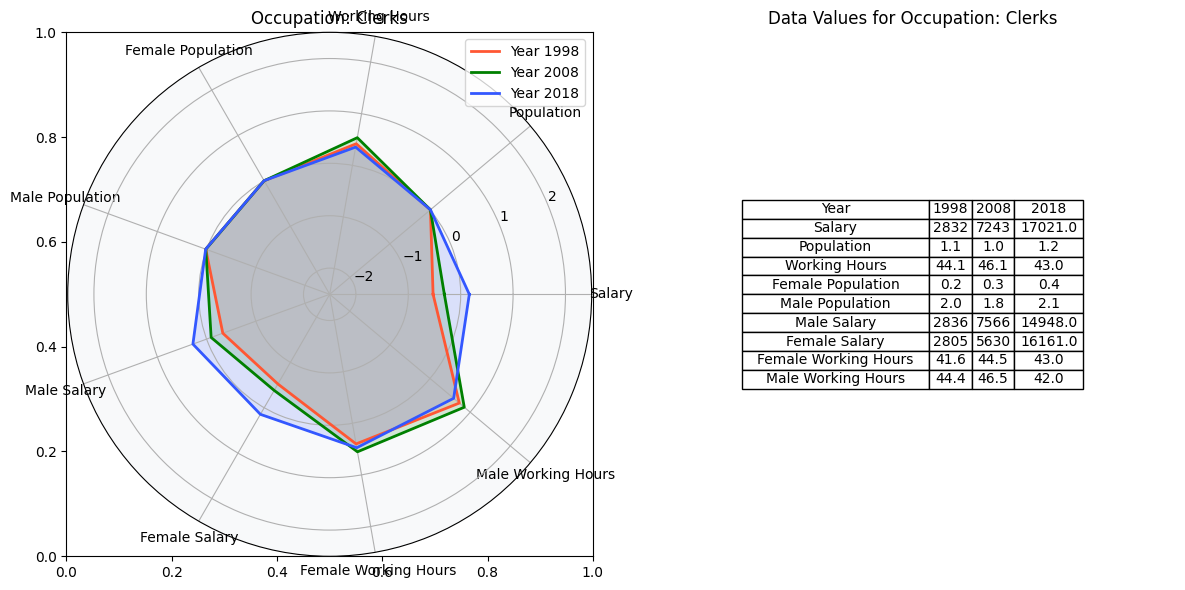

In [66]:

labels = ["Salary", "Population", "Working Hours", "Female Population", "Male Population",
          "Male Salary", "Female Salary", "Female Working Hours", "Male Working Hours"]


# Convert to radians for radar plot
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})


ax = fig.add_subplot(121, polar=True)  # Ensure correct polar plot
ax.set_facecolor("#F8F9FA")
for i, year in enumerate(years):
    values = [
        merged_df_scaled[f'total_ear_{year}'][Occupation],
        merged_df_scaled[f'total_pop_{year}'][Occupation],
        merged_df_scaled[f'total_wor_{year}'][Occupation],
        merged_df_scaled[f'female_pop_{year}'][Occupation],
        merged_df_scaled[f'male_pop_{year}'][Occupation],
        merged_df_scaled[f'male_ear_{year}'][Occupation],
        merged_df_scaled[f'female_ear_{year}'][Occupation],
        merged_df_scaled[f'female_wor_{year}'][Occupation],
        merged_df_scaled[f'male_wor_{year}'][Occupation]
    ]

    values += values[:1]  # Close shape
    angle_list = angles + angles[:1]

    ax.plot(angle_list, values, color=colors[i], linewidth=2, label=f'Year {year}')
    ax.fill(angle_list, values, color=colors[i], alpha=0.15)

ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.set_ylim(-2.5, 2.5)
ax.set_title(f"Occupation: {merged_df_scaled['Occupation'][Occupation]}")
ax.legend(loc="upper right")
ax.set_aspect('equal')  # Ensure circular radar plot

#  Data Table (Right Side)
ax2 = axs[1]
ax2.axis("off")  # Remove axes for a clean table look

# Prepare table data
table_data = []
for i, label in enumerate(labels):
    row = [label] + [
                     merged_df[f'female_pop_{year}'][Occupation] if "Female Population" in label else#this order seriously matters lol
                     merged_df[f'male_pop_{year}'][Occupation] if "Male Population" in label else
                     merged_df[f'male_ear_{year}'][Occupation] if "Male Salary" in label else
                     merged_df[f'female_ear_{year}'][Occupation] if "Female Salary" in label else
                     merged_df[f'female_wor_{year}'][Occupation] if "Female Working Hours" in label else
                     merged_df[f'male_wor_{year}'][Occupation] if "Male Working Hours" in label else 
                     merged_df[f'total_ear_{year}'][Occupation] if "Salary" in label else
                     merged_df[f'total_pop_{year}'][Occupation] if "Population" in label else
                     merged_df[f'total_wor_{year}'][Occupation] if "Working Hours" in label else 0
                     for year in years]
    table_data.append(row)

# Column headers
columns = ["Year"] + [str(year) for year in years]

# Create the table
table = ax2.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3])  # Adjust column width

ax2.set_title(f"Data Values for Occupation: {merged_df['Occupation'][Occupation]}", fontsize=12)

#  Adjust Layout and Show Plot
plt.tight_layout()
plt.show()